# Диференциальный алгоритм оптимизации при двухсторонних ограничениях

In [1]:
# for Jupyter Lab
# %matplotlib ipympl 

# for Jupyter Notebook
%matplotlib notebook

import numpy as np
from numpy import array

import diffalg
import plotting
from scipy.optimize import minimize

Стоит задача условной оптимизации функции 
$$f(\mathbf{x}) = 4 x_1^2 + 2 x_2^2 - 4 x_1 x_2 - 8 x_2$$
при двухсторонних ограничениях
$$\Omega: \begin{align} &0 \leq x_1 \leq 4, \\ &0 \leq x_2 \leq 3. \end{align}$$

Предлагается использовать дифференциальный алгоритм для решения этой задачи.

In [2]:
# функция и её градиент
def f(x):
    return (4*x[0]**2 + 2*x[1]**2 
            - 4*x[0]*x[1] - 8*x[1])

def jacf(x):
    return array([8*x[0] - 4*x[1],
                  4*x[1] - 4*x[0] - 8])

# вектор левых границ прямоугольника Omega 
left  = array([0, 0])
# вектор правых границ прямоугольника Omega 
right = array([4, 3])

# начальная точка
x0 = array([2., 1.])

# допустимая точность
eps = 1e-4

Построим 3-мерный график функции в допустимой области и её линии уровня.

<IPython.core.display.Javascript object>


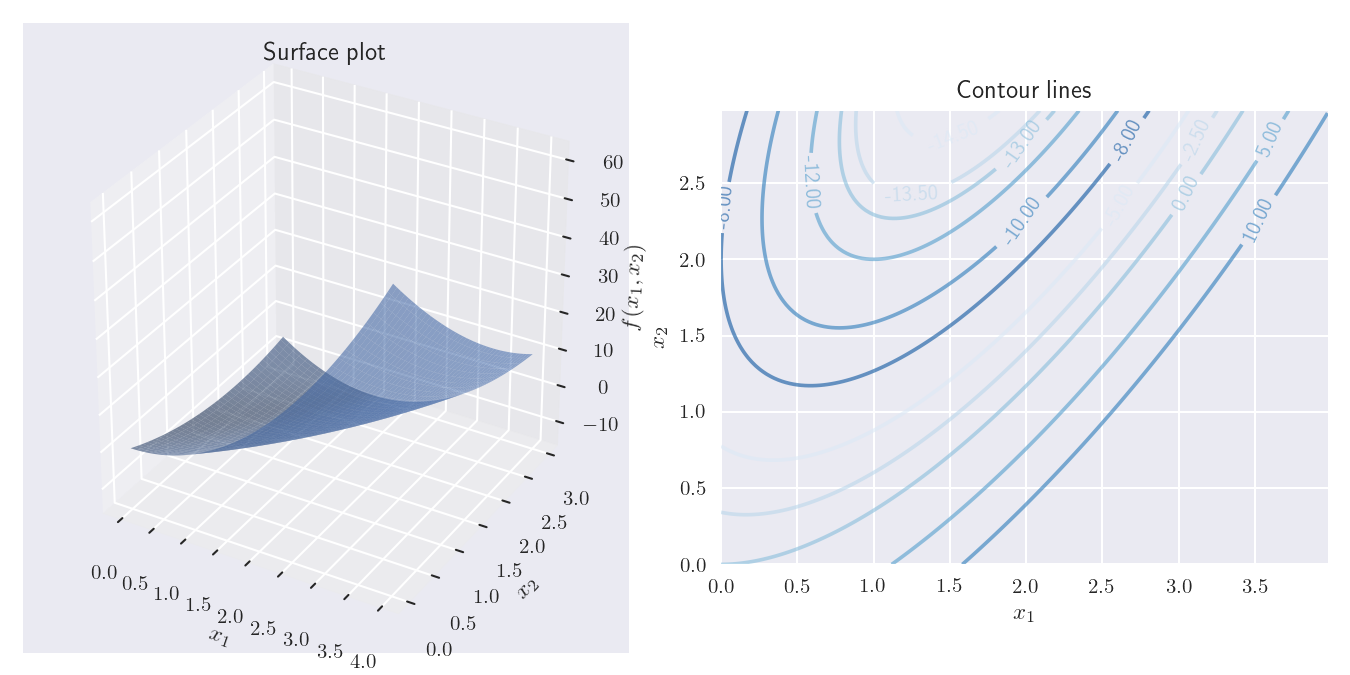

In [3]:
delta = 0.025
x1 = np.arange(left[0], right[0], delta)
x2 = np.arange(left[1], right[1], delta)
xx1, xx2 = np.meshgrid(x1, x2)
ff = f([xx1, xx2])

levels = array([-14.5, -13.5, -13, -12, -10, -8, -5, -2.5, 0, 5, 10])
fig = plotting.plot_surface_and_contours(ff, xx1, xx2, levels)
fig.tight_layout()

Функция $f$ выпукла, поэтому у неё существует единственный глобальный безусловный минимум. Область $\Omega$ также является выпуклой, поэтому задача условной оптимизации также имеет единственное решение. Найдём их сперва пользуясь функцией `scipy.optimize.minimize()`:

In [4]:
# безусловный минимум
unconstrained_min = minimize(f, x0, jac=jacf, tol=eps)
print("Глобальный безусловный минимум: %.2f" % unconstrained_min.fun)
print("Точка глобального безусловного минимума: (%.2f; %.2f)\n" % tuple(unconstrained_min.x))

# ограничения
cons = ({'type': 'ineq', 'fun': lambda x:  x[0]-left[0]},
        {'type': 'ineq', 'fun': lambda x:  x[1]-left[1]},
        {'type': 'ineq', 'fun': lambda x:  right[0]-x[0]},
        {'type': 'ineq', 'fun': lambda x:  right[1]-x[1]})

# условный минимум
constrained_min = minimize(f, x0, jac=jacf, constraints=cons, tol=eps)
print("Глобальный условный минимум: %.2f" % constrained_min.fun)
print("Точка глобального условного минимума: (%.2f; %.2f)\n" % tuple(constrained_min.x))

Глобальный безусловный минимум: -16.00
Точка глобального безусловного минимума: (2.00; 4.00)

Глобальный условный минимум: -15.00
Точка глобального условного минимума: (1.50; 3.00)



Теперь воспользуемся дифференциальным алгоритмом:

In [5]:
constrained_min_da = diffalg.minimize_diffalg(f, x0, jacf, left, right, tol=eps)
print("Глобальный условный минимум: %.2f" % constrained_min_da.fun)
print("Точка глобального условного минимума: (%.2f; %.2f)\n" % tuple(constrained_min_da.x))

Глобальный условный минимум: -15.00
Точка глобального условного минимума: (1.50; 3.00)



Как видим, он привёл к той же самой точке. Сравним методы по количеству итераций и скорости сходимости:

In [6]:
print("Количество итераций, за которое сошёлся дифференциальный алгоритм: ", constrained_min_da.nit)
print("Время выполнения:")
%timeit diffalg.minimize_diffalg(f, x0, jacf, left, right, tol=eps)

print("\nКоличество итераций, за которое сошёлся библиотечный алгоритм: ", constrained_min.nit)
print("Время выполнения:")
%timeit minimize(f, x0, jac=jacf, constraints=cons, tol=eps)

Количество итераций, за которое сошёлся дифференциальный алгоритм:  2
Время выполнения:
1.24 ms ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Количество итераций, за которое сошёлся библиотечный алгоритм:  4
Время выполнения:
872 µs ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
